In [1]:
import os
import numpy as np
import flopy
import flopy.seawat as swt
import matplotlib.pyplot as plt
import math

# Model domain and grid properties in UTM coordinates
utm_coords = [(571890, 4924941), (573724, 4926178), (574960, 4924345), (573128, 4923108)] # (top_L, top_R, bot_L, bot_R) UTM 17T
nrow, ncol = 500, 500  # Number of rows and columns in the model grid
lr = math.dist(utm_coords[0] , utm_coords[1]) 
lc = math.dist(utm_coords[0] , utm_coords[3]) 
delr = lr/ ncol  # Grid spacing in the x-direction
delc = lc/ nrow  # Grid spacing in the y-direction
top_elevation = 195.0  # Top elevation of the model domain
bot_elevation = 180.0-10  # Bottom elevation of the model domain ()

nlay = 25


In [42]:
# Create the SEAWAT model object
model_name = "wasaga_regional_model"
model_ws = os.path.join(".", "output")  # Specify the model workspace
swt_model = swt.Seawat(modelname=model_name, model_ws=model_ws, exe_name="swtv4")

In [44]:

# Specify the discretization of the model grid
dis = flopy.modflow.ModflowDis(swt_model, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc, top=top_elevation, botm=bot_elevation)

# Add boundary conditions and other model parameters as needed
# For example, you can add wells, rivers, constant head boundaries, etc. using relevant packages (e.g., ModflowWel, ModflowRiv, ModflowChd).
# Also, you can use the SEAWAT-specific packages such as MFSor, MT3DMS, and SEAWAT.

In [35]:
# Write the SEAWAT input files  
swt_model.write_input()

# Run the SEAWAT model
success, swtoutput = swt_model.run_model(silent=True, pause=False)

# Check if the model run was successful
if success:
    print("SEAWAT model run completed successfully.")
else:
    print("SEAWAT model run failed.")

SEAWAT model run failed.


In [56]:
import numpy as np

# Given data points
data_points = [(0, 191.5), (0.2, 191.5), (0.5, 193), (2, 180.5), (2.2, 180.5)]

# Unzip the data points into separate x and y lists
x_values, y_values = zip(*data_points)

# Define the target number of values
num_values = 500

# Generate an array of linearly spaced x values between the minimum and maximum values
x_interpolated = np.linspace(min(x_values), max(x_values), num_values)

# Perform linear interpolation to get the corresponding y values for the interpolated x values
y_interpolated = np.interp(x_interpolated, x_values, y_values)

# Create a list of tuples with the interpolated x and y values
interpolated_list = list(zip(x_interpolated, y_interpolated))

# Print the interpolated list
print(interpolated_list)


[(0.0, 191.5), (0.004408817635270542, 191.5), (0.008817635270541083, 191.5), (0.013226452905811625, 191.5), (0.017635270541082167, 191.5), (0.022044088176352707, 191.5), (0.02645290581162325, 191.5), (0.030861723446893793, 191.5), (0.03527054108216433, 191.5), (0.03967935871743487, 191.5), (0.04408817635270541, 191.5), (0.04849699398797596, 191.5), (0.0529058116232465, 191.5), (0.05731462925851704, 191.5), (0.06172344689378759, 191.5), (0.06613226452905813, 191.5), (0.07054108216432867, 191.5), (0.0749498997995992, 191.5), (0.07935871743486975, 191.5), (0.08376753507014029, 191.5), (0.08817635270541083, 191.5), (0.09258517034068138, 191.5), (0.09699398797595192, 191.5), (0.10140280561122246, 191.5), (0.105811623246493, 191.5), (0.11022044088176354, 191.5), (0.11462925851703408, 191.5), (0.11903807615230462, 191.5), (0.12344689378757517, 191.5), (0.1278557114228457, 191.5), (0.13226452905811625, 191.5), (0.1366733466933868, 191.5), (0.14108216432865733, 191.5), (0.14549098196392787, 191

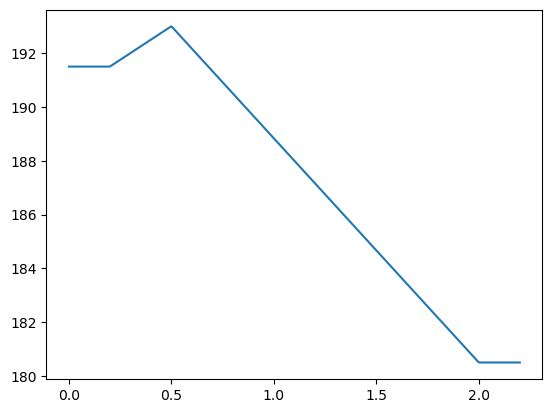

In [58]:
x = np.array(interpolated_list)[:,0]
y = np.array(interpolated_list)[:,1]
plt.plot(x,y)